In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [17]:
df = pd.read_excel("Output_Data/new_df.xlsx")
df.head()

,SA2_NAME,SA2_MAINCODE,Number of available beds,Population,Median_Annual_Income,No_of_Dwellings,No_of_people_earning_income,No_of_tertiary_educated,Monthly_Mortgage_Repayment,Number_of_renters,No_of_indigenous_ppl,AREA_ALBERS_SQKM
0,ACT - South West,801111140,45.7,5158,352,190,317,109,53,31,0,416.6124
1,Acton - Upper Burnie,604011075,145.0,3206,1427,1628,1184,135,438,556,5,2.1455
2,Adelaide,401011001,812.0,16285,8464,8147,5972,5237,904,3978,7,10.4824
3,Adelaide Hills,401021003,17.0,6914,3466,2670,3558,944,1132,227,0,364.4390
4,Airlie - Whitsundays,312031359,33.0,13375,8546,5701,6653,1359,1061,1788,22,304.0111


In [18]:
X_train = df.drop(['Number of available beds', 'SA2_NAME', 'SA2_MAINCODE', 'AREA_ALBERS_SQKM'], axis=1).fillna(0)

y_train = df['Number of available beds'].fillna(0)

Text(0.5, 1.0, 'Which Feature(s) are most important')

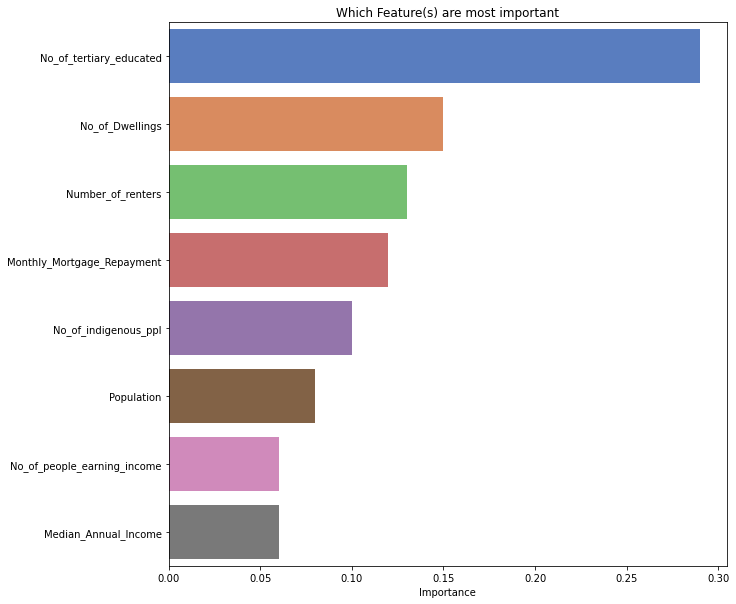

In [19]:
#Feature importance
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=1000, random_state=0, n_jobs=-1)
rfr.fit(X_train, y_train)

f_im = rfr.feature_importances_.round(2)
rank = pd.Series(f_im, index=X_train.columns).sort_values(ascending=False)

figsize = [10.0, 10.0]

plt.figure(figsize=figsize)
sns.barplot(y=rank.index,x=rank.values,palette='muted')
plt.xlabel('Importance')
plt.title('Which Feature(s) are most important')

In [20]:
# Import machine learning modules

from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 

# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    score = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    
    return train_pred, score



# Random Forest Regressor ----------------------------------------------------------------

train_pred_log, acc_rfor = fit_ml_algo(RandomForestRegressor(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)

# Linear Regression ---------------------------------------------------------------------

train_pred_log, acc_lin = fit_ml_algo(LinearRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)


# Decision Tree Regressor --------------------------------------------------------------------

train_pred_knn, acc_dtr = fit_ml_algo(DecisionTreeRegressor(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)


# Support Vector Regressor --------------------------------------------------------------------

train_pred_svr, acc_svr = fit_ml_algo(SVR(),
                                           X_train,
                                           y_train,
                                           10)




In [21]:

# Accuracy Scores --------------------------------------------------------------------------

models = pd.DataFrame({
    'Model': ['RandomForestRegressor', 'LinearRegression', 'DecisionTreeRegressor', 'SVR'],
    'Score': [
        acc_rfor,
        acc_lin, 
        acc_dtr, 
        acc_svr
    ]})
print("---Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Accuracy Scores---


,Model,Score
2,DecisionTreeRegressor,100.00
0,RandomForestRegressor,88.69
1,LinearRegression,17.37
3,SVR,-17.84


In [22]:
regressor = RandomForestRegressor(max_depth=16)
regressor.fit(X_train,y_train)
print(round(regressor.score(X_train, y_train) * 100, 2))

88.37


In [23]:
import pickle

filename = 'Model\hospital_bed_pred.pkl'
pickle.dump(regressor, open(filename, 'wb'))

In [24]:
X_train.columns

Index(['Population', 'Median_Annual_Income', 'No_of_Dwellings',
       'No_of_people_earning_income', 'No_of_tertiary_educated',
       'Monthly_Mortgage_Repayment', 'Number_of_renters',
       'No_of_indigenous_ppl'],
      dtype='object')

In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Population                   898 non-null    int64
 1   Median_Annual_Income         898 non-null    int64
 2   No_of_Dwellings              898 non-null    int64
 3   No_of_people_earning_income  898 non-null    int64
 4   No_of_tertiary_educated      898 non-null    int64
 5   Monthly_Mortgage_Repayment   898 non-null    int64
 6   Number_of_renters            898 non-null    int64
 7   No_of_indigenous_ppl         898 non-null    int64
dtypes: int64(8)
memory usage: 56.2 KB


In [26]:
Population = 10000
Median_Annual_Income = 90000
No_of_Dwellings = 1000
No_of_people_earning_income = 9000
No_of_tertiary_educated = 2000
Monthly_Mortgage_Repayment = 1000
Number_of_renters = 90
No_of_indigenous_ppl = 1

print(regressor.predict([[Population, Median_Annual_Income, No_of_Dwellings,
       No_of_people_earning_income, No_of_tertiary_educated,
       Monthly_Mortgage_Repayment, Number_of_renters,
       No_of_indigenous_ppl]]))

[483.65]
